In [200]:
import pandas as pd
data = pd.read_csv("wine.data",encoding = 'ISO-8859-1', index_col=False)
data.head()

,Class,Alcool,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [201]:
#FIRST PART -> USING ACP TO REDUCE NUMBER OF ATTRIBUTES THEN APPLYING K-MEANS

In [202]:
#Import des autres modules utiles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = data.shape[0]
print('Nombre total d\'individus :', n)

## La troisième variable contient le genre musical de chaque musique.
## Récupérer cette donnée qualitative dans un vecteur genre.
genre = data.loc[:,data.columns[2]].to_list()


## Récupérer le tableau des données quantitatives

# Considérer les données de la colonne start_col à la dernière colonne
start_col = 1 # doit être entre 3 (la colonne 2 est celle du genre musical) et data.shape[1]

p = data.shape[1] - start_col
print('La dimension des données est : ', p)

X = data.loc[:, data.columns[start_col]:data.columns[start_col+p-1]].to_numpy().reshape([n,p])
print('Taille du tableau des données :', X.shape,'\n')

mu = np.mean(X,axis=0)

sigma = np.sqrt( (1/n) * np.sum((X - mu )**2,axis=0))

x_tilde = (X-mu)/sigma

c = (1/n)*np.dot(np.transpose(x_tilde),x_tilde)

vp2,vect_p2 = np.linalg.eig(c)

colonnes = list(data.columns)
colonnes.pop(0)
print("colonnes avant :", colonnes)

for j in range(len(vp2)):
    indice = j
    for i in range(j, len(vp2)):
        if vp2[i] > vp2[indice]:
            indice = i
    temp = vp2[j]
    temp2 = vect_p2[j]
    temp3 = colonnes[j]
    vp2[j] = vp2[indice]
    vect_p2[j] = vect_p2[indice]
    colonnes[j] = colonnes[indice]
    vp2[indice] = temp
    vect_p2[indice] = temp2
    colonnes[indice] = temp3

print("Colonnes apres : ", colonnes)

Nombre total d'individus : 178
La dimension des données est :  13
Taille du tableau des données : (178, 13) 

colonnes avant : ['Alcool', 'Malic Acid', ' Ash', ' Alcalinity of ash', ' Magnesium', ' Total phenols', ' Flavanoids', ' Nonflavanoids phenols', ' Proanthocyanis', ' Color intensity', ' Hue', ' OD280/OD315 of diluted wines', ' Proline']
Colonnes apres :  ['Alcool', 'Malic Acid', ' Ash', ' Alcalinity of ash', ' Magnesium', ' Total phenols', ' Flavanoids', ' Proanthocyanis', ' Hue', ' Proline', ' OD280/OD315 of diluted wines', ' Color intensity', ' Nonflavanoids phenols']


valeurs propres
[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
 
vecteurs propres
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-

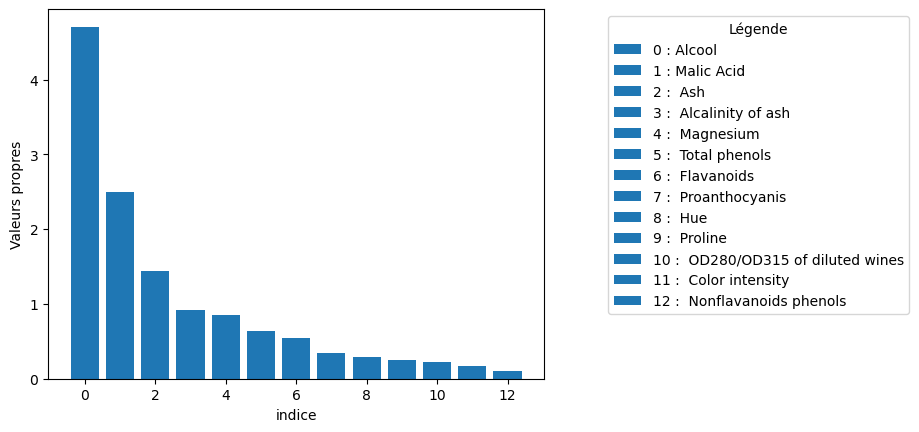

In [203]:
print('valeurs propres')
print(vp2)

print(' ')
print('vecteurs propres')
print(vect_p2)

vp2_ordonnes = np.zeros((len(vp2)))

for i in range(len(vp2)):
    vp2_ordonnes[i] = vp2[i]

vp2_ordonnes = sorted(vp2_ordonnes,reverse=True)

valeurs = [ i for i in range(len(vp2))]

bars = plt.bar(valeurs,vp2_ordonnes)
plt.xlabel('indice')
plt.ylabel('Valeurs propres')

descriptions = [f'{i} : {colonnes[i]}' for i in range(len(colonnes))]

# Ajout manuel des numéros dans la légende
plt.legend(bars, descriptions, loc='upper right', title='Légende', bbox_to_anchor=(1.75, 1))
plt.savefig('vp.png', dpi=300, bbox_inches='tight')
# Affichage
plt.show()

In [204]:
#Inertie

somme_vp2 = np.sum(vp2)

I2 = vp2/somme_vp2

somme = 0
i = 0

while somme < 0.9:
    somme += I2[i]
    i += 1

print("Il faut ", i, "attributs pour avoir", somme," %")

S = np.dot(x_tilde,vect_p2)

Il faut  8 attributs pour avoir 0.9201754434577263  %


[0, 1, 2, 3, 4, 5, 6, 8]

=== Résultats ===
Taux de succès global : 49.44 %
Taux de succès par cluster :
  - Cluster 1 : 62.71 %
  - Cluster 2 : 64.79 %
  - Cluster 3 : 10.42 %

Centres des clusters :
[[ 13.17530864   2.43753086   2.41925926  19.10493827 102.7654321
    2.36333333   2.07925926   1.55209877]
 [ 13.32769231   2.06653846   2.51192308  19.52692308 125.11538462
    2.53153846   2.46346154   1.87576923]
 [ 12.6815493    2.31971831   2.25309859  19.92816901  87.
    2.13070423   1.81323944   1.53084507]]


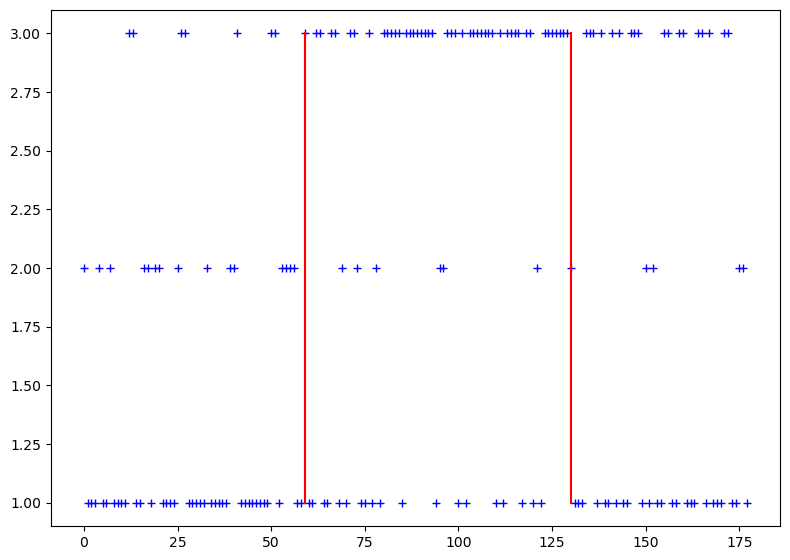

In [205]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

# Initialisation du modèle K-Means
model = KMeans(n_clusters=3, init='k-means++', n_init=1000)

# Sélection des colonnes pertinentes
colonnes_pas_trie = list(data.columns)
colonnes_pas_trie.pop(0)
indices = []
for i in range(8):
    for j in range(len(colonnes)):
        if colonnes[i] == colonnes_pas_trie[j]:
            indices.append(j)

print(indices)

# Réduction des données
X_red = X[:, indices]
model.fit(X_red)

# Classes existantes
classes = data.iloc[:, 0].to_numpy()  # Les clusters existants (première colonne)
labels_pred = model.labels_           # Les clusters prédits par K-Means

# Calcul de la matrice de confusion
matrice_confusion = confusion_matrix(classes, labels_pred)

# Aligner les clusters K-Means avec les clusters existants
ligne, colonne = linear_sum_assignment(-matrice_confusion)
mapping = {colonne[i]: ligne[i] for i in range(len(ligne))}

# Appliquer le mapping
labels_alignés = np.array([mapping[label] for label in labels_pred])

# Calcul des taux de succès
taux_succes_global = np.mean(classes == labels_alignés) * 100
taux_succes_par_cluster = {
    cluster: np.mean(classes[classes == cluster] == labels_alignés[classes == cluster]) * 100
    for cluster in np.unique(classes)
}

# Affichage des résultats
print("\n=== Résultats ===")
print("Taux de succès global :", round(taux_succes_global, 2), "%")
print("Taux de succès par cluster :")
for cluster, taux in taux_succes_par_cluster.items():
    print(f"  - Cluster {cluster} : {round(taux, 2)} %")

# Affichage des centres des clusters
print("\nCentres des clusters :")
print(model.cluster_centers_)

# Visualisation des clusters
fig, ax = plt.subplots(figsize=(8, 6))

tab = np.array(labels_pred) + 1  # Numéros de clusters alignés (pour correspondre à 1, 2, 3)

ax.annotate('Classe 1', (30, 0),xytext=(0.8, 0.9))

# Ajout d'un titre global
#fig.suptitle("Cluster Analysis After ACP using Lloyd algorithm", fontsize=16)

ax.plot(tab, 'b+')
ax.plot([59, 59], [1, 3], 'r')
ax.plot([130, 130], [1, 3], 'r')

# Ajustement des marges pour éviter les chevauchements
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher la figure
plt.savefig('lloyd.png', dpi=300, bbox_inches='tight')
plt.show()


In [206]:
from copy import deepcopy

tab = []
maxi = 0
for i in range(100):
    model = KMeans(n_clusters=3, init='k-means++', n_init=1000,random_state = i)
    
    # Sélection des colonnes pertinentes
    colonnes_pas_trie = list(data.columns)
    colonnes_pas_trie.pop(0)
    indices = []
    for i in range(8):
        for j in range(len(colonnes)):
            if colonnes[i] == colonnes_pas_trie[j]:
                indices.append(j)
    
    # Réduction des données
    X_red = X[:, indices]
    model.fit(X_red)
    
    # Classes existantes
    classes = data.iloc[:, 0].to_numpy()  # Les clusters existants (première colonne)
    labels_pred = model.labels_           # Les clusters prédits par K-Means
    
    # Calcul de la matrice de confusion
    matrice_confusion = confusion_matrix(classes, labels_pred)
    
    # Aligner les clusters K-Means avec les clusters existants
    ligne, colonne = linear_sum_assignment(-matrice_confusion)
    mapping = {colonne[i]: ligne[i] for i in range(len(ligne))}
    
    # Appliquer le mapping
    labels_alignés = np.array([mapping[label] for label in labels_pred])
    
    # Calcul des taux de succès
    taux_succes_global = np.mean(classes == labels_alignés) * 100
    taux_succes_par_cluster = {
        cluster: np.mean(classes[classes == cluster] == labels_alignés[classes == cluster]) * 100
        for cluster in np.unique(classes)
    }

    print(taux_succes_global)       

49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.43820224719101
49.4382022

In [207]:
tab = np.zeros(13)

for i in range(48):
    for j in range(13):
        tab[j] += X[i+130][j]

print(tab/48)

print(model.cluster_centers_[2])

print(indices)

for i in range(8):
    tab[indices[i]] = abs(tab[indices[i]] - model.cluster_centers_[2][i])


print(tab)

[1.31537500e+01 3.33375000e+00 2.43708333e+00 2.14166667e+01
 9.93125000e+01 1.67875000e+00 7.81458333e-01 4.47500000e-01
 1.15354167e+00 7.39624998e+00 6.82708333e-01 1.68354167e+00
 6.29895833e+02]
[ 13.17530864   2.43753086   2.41925926  19.10493827 102.7654321
   2.36333333   2.07925926   1.55209877]
[0, 1, 2, 3, 4, 5, 6, 8]
[6.18204691e+02 1.57582469e+02 1.14560741e+02 1.00889506e+03
 4.66423457e+03 7.82166667e+01 3.54307407e+01 2.14800000e+01
 5.38179012e+01 3.55019999e+02 3.27700000e+01 8.08100000e+01
 3.02350000e+04]


[0, 1, 2, 3, 4, 5, 6, 8]

=== Résultats ===
Taux de succès global : 49.44 %
Taux de succès par cluster :
  - Cluster 1 : 62.71 %
  - Cluster 2 : 64.79 %
  - Cluster 3 : 10.42 %

Centres des clusters :
[[ 12.6815493    2.31971831   2.25309859  19.92816901  87.
    2.13070423   1.81323944   1.53084507]
 [ 13.17530864   2.43753086   2.41925926  19.10493827 102.7654321
    2.36333333   2.07925926   1.55209877]
 [ 13.32769231   2.06653846   2.51192308  19.52692308 125.11538462
    2.53153846   2.46346154   1.87576923]]


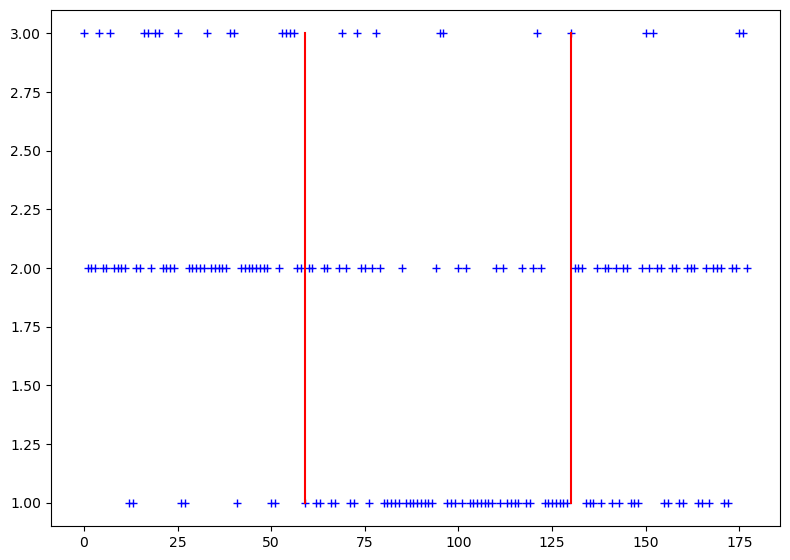

In [208]:
from sklearn.cluster import KMeans 

model2 = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan')

colonnes_pas_trie = list(data.columns)
colonnes_pas_trie.pop(0)
indices = []
for i in range(8):
    for j in range(len(colonnes)):
        if colonnes[i] == colonnes_pas_trie[j]:
            indices.append(j)

print(indices)

X_red2 = X[:,indices]

model2.fit(X_red2)

# Classes existantes
classes = data.iloc[:, 0].to_numpy()  # Les clusters existants (première colonne)
labels_pred = model2.labels_           # Les clusters prédits par K-Means

# Calcul de la matrice de confusion
matrice_confusion = confusion_matrix(classes, labels_pred)

# Aligner les clusters K-Means avec les clusters existants
ligne, colonne = linear_sum_assignment(-matrice_confusion)
mapping = {colonne[i]: ligne[i] for i in range(len(ligne))}

# Appliquer le mapping
labels_alignés = np.array([mapping[label] for label in labels_pred])

# Calcul des taux de succès
taux_succes_global = np.mean(classes == labels_alignés) * 100
taux_succes_par_cluster = {
    cluster: np.mean(classes[classes == cluster] == labels_alignés[classes == cluster]) * 100
    for cluster in np.unique(classes)
}

# Affichage des résultats
print("\n=== Résultats ===")
print("Taux de succès global :", round(taux_succes_global, 2), "%")
print("Taux de succès par cluster :")
for cluster, taux in taux_succes_par_cluster.items():
    print(f"  - Cluster {cluster} : {round(taux, 2)} %")

# Affichage des centres des clusters
print("\nCentres des clusters :")
print(model2.cluster_centers_)

# Visualisation des clusters
fig, ax = plt.subplots(figsize=(8, 6))

tab = np.array(labels_pred) + 1  # Numéros de clusters alignés (pour correspondre à 1, 2, 3)

ax.annotate('Classe 1', (30, 0),xytext=(0.8, 0.9))

# Ajout d'un titre global
#fig.suptitle("Cluster Analysis After ACP using Elkan algorithm", fontsize=16)

ax.plot(tab, 'b+')
ax.plot([59, 59], [1, 3], 'r')
ax.plot([130, 130], [1, 3], 'r')

# Ajustement des marges pour éviter les chevauchements
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher la figure
plt.savefig('elkan.png', dpi=300, bbox_inches='tight')
plt.show()


In [209]:
#SECOND PART -> APPLYING K-MEANS TO ALL ATRIBUTES

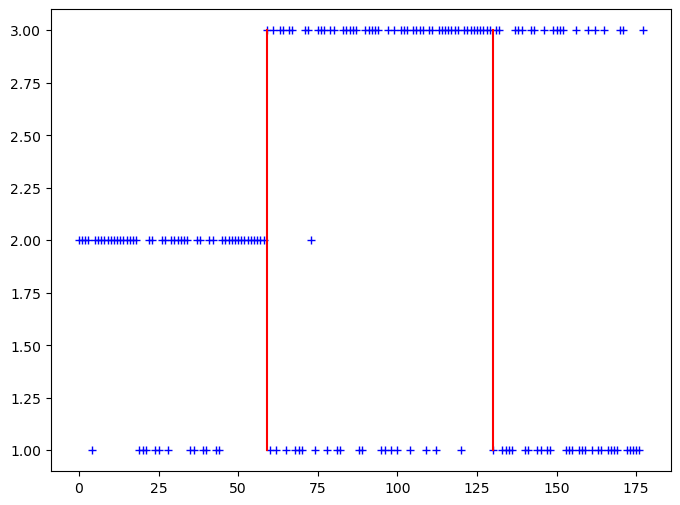

[0.7758620689655172, 0.6944444444444444, 0.6041666666666666]
0.6914910600255427


In [210]:
#all atributes elkan algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math


classes = data.loc[:,data.columns[0]].to_numpy()

#plotting
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan').fit(X)
tab = np.array(model.labels_)
tab = tab +1
plt.subplots(figsize=(8, 6))
plt.plot(tab, 'b+')
plt.plot([59,59], [1,3],'r')
plt.plot([130,130], [1,3],'r')
plt.show()

#success
stops = [0, 58, 130, 178]
success_t_elkan = []
for i in range(1,4):
    tabcomp = tab[stops[i-1]:stops[i]].tolist()
    one = tabcomp.count(1)
    two = tabcomp.count(2)
    three = tabcomp.count(3)
    cmp = max(one, two, three)
    success_t_elkan.append(cmp/(stops[i]-stops[i-1]))
print(success_t_elkan)
success_rate_elkan =(success_t_elkan[0]+success_t_elkan[1]+success_t_elkan[2])/3
print(success_rate_elkan)


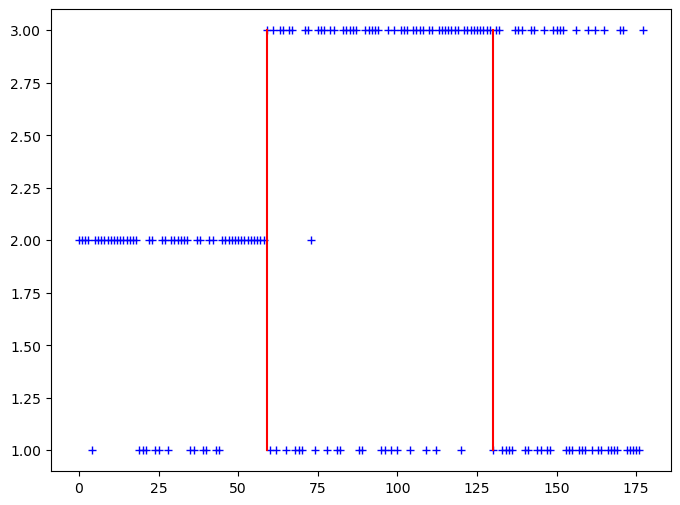

[0.7758620689655172, 0.6944444444444444, 0.6041666666666666]
0.6914910600255427


In [221]:
#all atributes lloyd algorithm

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#plotting
model = KMeans(n_clusters=3, init='k-means++', n_init=1000,  algorithm='lloyd').fit(X)
tab = np.array(model.labels_)
tab = tab +1
plt.subplots(figsize=(8, 6))
plt.plot(tab, 'b+')
plt.plot([59,59], [1,3],'r')
plt.plot([130,130], [1,3],'r')
plt.show()


#success
stops = [0, 58, 130, 178]
success_t_lloyd = []
for i in range(1,4):
    tabcomp = tab[stops[i-1]:stops[i]].tolist()
    one = tabcomp.count(1)
    two = tabcomp.count(2)
    three = tabcomp.count(3)
    cmp = max(one, two, three)
    success_t_lloyd.append(cmp/(stops[i]-stops[i-1]))
print(success_t_lloyd)
success_rate_lloyd =(success_t_lloyd[0]+success_t_lloyd[1]+success_t_lloyd[2])/3
print(success_rate_lloyd)

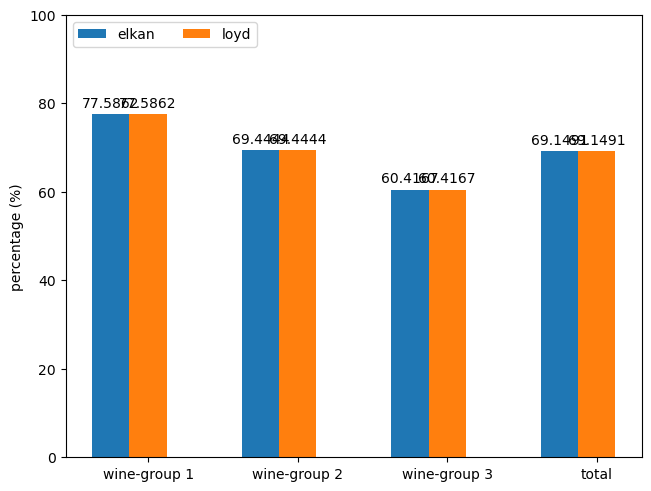

In [222]:
#comparing lloyd, elkan
groups = ("wine-group 1", "wine-group 2", "wine-group 3", "total")
algorithms = {
    'elkan': (success_t_elkan[0]*100,success_t_elkan[1]*100,success_t_elkan[2]*100,success_rate_elkan*100),
    'loyd': (success_t_lloyd[0]*100,success_t_lloyd[1]*100,success_t_lloyd[2]*100,success_rate_lloyd*100),
}
g = np.arange(len(groups))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in algorithms.items():
    offset = width * multiplier
    rects = ax.bar(g + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('percentage (%)')
ax.set_xticks(g + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

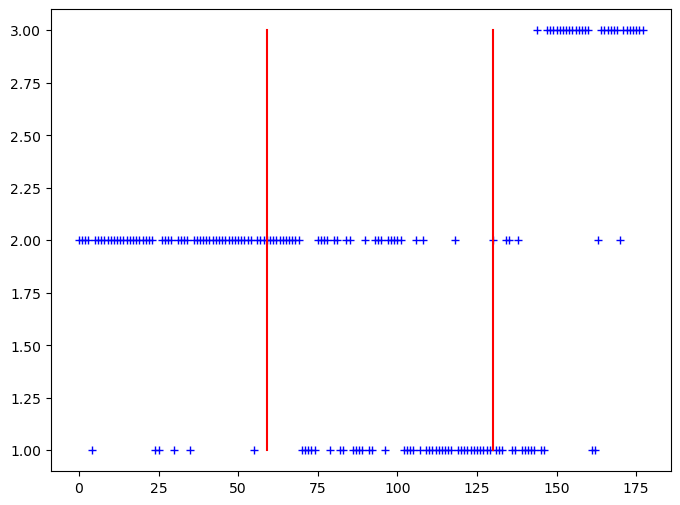

[0.896551724137931, 0.5555555555555556, 0.5833333333333334]
0.6784802043422733


In [226]:
#attributes given by normal people

data1 = data.loc[:,[data.columns[2],data.columns[4],data.columns[6],data.columns[10]]].to_numpy()


#plotting
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan').fit(data1)
tab = np.array(model.labels_)
tab = tab +1
plt.subplots(figsize=(8, 6))
plt.plot(tab, 'b+')
plt.plot([59,59], [1,3],'r')
plt.plot([130,130], [1,3],'r')
plt.show()

#success
stops = [0, 58, 130, 178]
success_t_normal = []
for i in range(1,4):
    tabcomp = tab[stops[i-1]:stops[i]].tolist()
    one = tabcomp.count(1)
    two = tabcomp.count(2)
    three = tabcomp.count(3)
    cmp = max(one, two, three)
    success_t_normal.append(cmp/(stops[i]-stops[i-1]))
print(success_t_normal)
success_rate_normal =(success_t_normal[0]+success_t_normal[1]+success_t_normal[2])/3
print(success_rate_normal)

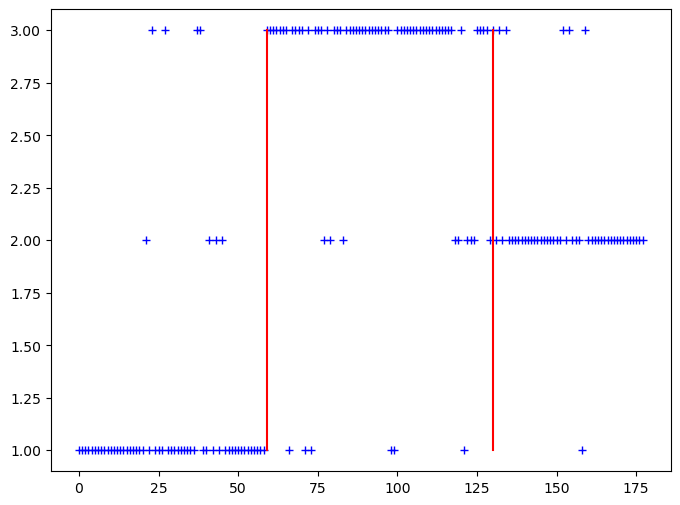

[0.8620689655172413, 0.7777777777777778, 0.8541666666666666]
0.831337803320562


In [227]:
#attributes given by profetional person

data1 = data.loc[:,[data.columns[1],data.columns[2], data.columns[3], data.columns[7], data.columns[9], data.columns[11]]].to_numpy()


#plotting
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan').fit(data1)
tab = np.array(model.labels_)
tab = tab +1
plt.subplots(figsize=(8, 6))
plt.plot(tab, 'b+')
plt.plot([59,59], [1,3],'r')
plt.plot([130,130], [1,3],'r')
plt.show()

#success
stops = [0, 58, 130, 178]
success_t_pro = []
for i in range(1,4):
    tabcomp = tab[stops[i-1]:stops[i]].tolist()
    one = tabcomp.count(1)
    two = tabcomp.count(2)
    three = tabcomp.count(3)
    cmp = max(one, two, three)
    success_t_pro.append(cmp/(stops[i]-stops[i-1]))
print(success_t_pro)
success_rate_pro =(success_t_pro[0]+success_t_pro[1]+success_t_pro[2])/3
print(success_rate_pro)

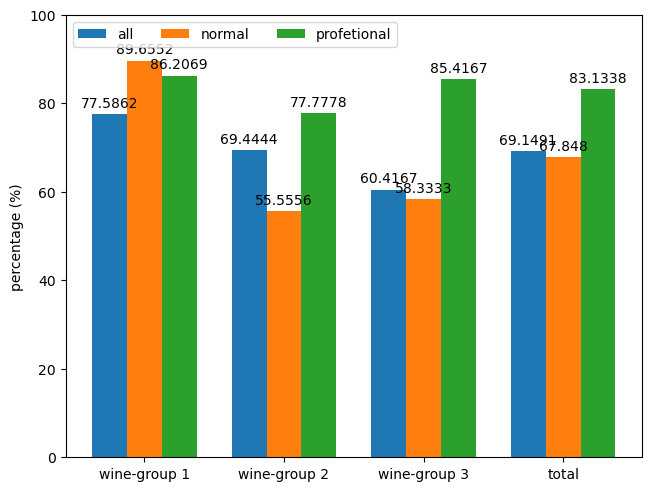

In [228]:
#comparaison quantite/qualite atributs choisis
groups = ("wine-group 1", "wine-group 2", "wine-group 3", "total")
algorithms = {
    'all': (success_t_lloyd[0]*100,success_t_lloyd[1]*100,success_t_lloyd[2]*100,success_rate_lloyd*100),
    'normal': (success_t_normal[0]*100,success_t_normal[1]*100,success_t_normal[2]*100,success_rate_normal*100),
    'profetional': (success_t_pro[0]*100,success_t_pro[1]*100,success_t_pro[2]*100,success_rate_pro*100),
}
g = np.arange(len(groups))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in algorithms.items():
    offset = width * multiplier
    rects = ax.bar(g + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('percentage (%)')
ax.set_xticks(g + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()